# Importing libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

# Importing Dataset

In [61]:
dataset = pd.read_csv('english.csv')
print(dataset)

                   image label
0     Img/img001-001.png     0
1     Img/img001-002.png     0
2     Img/img001-003.png     0
3     Img/img001-004.png     0
4     Img/img001-005.png     0
...                  ...   ...
3405  Img/img062-051.png     z
3406  Img/img062-052.png     z
3407  Img/img062-053.png     z
3408  Img/img062-054.png     z
3409  Img/img062-055.png     z

[3410 rows x 2 columns]


# Importing images from dataset
## resizing image to 18x24 pixels

In [ ]:
from skimage.transform import resize
x,y = [],[]
for i in range(1980,3410):
    img = imread(dataset.iloc[i,0])
    img = resize(img,(18,24))
    x.append(img)
    y.append(dataset.iloc[i,1])

## Converting x,y to numpy arrays

In [ ]:
x = np.array(x)
y = np.array(y)

## Splitting data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## visualising first 4 images from training set

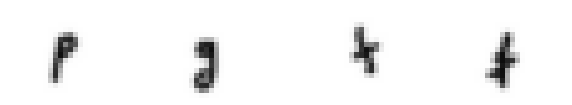

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## reshaping the arrays to train (flatining images)

In [ ]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

# Training and testing our model

In [99]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.06,C=7)
classifier.fit(x_train,y_train)

SVC(C=7, gamma=0.06)

In [100]:
y_pred = classifier.predict(x_test)

## Checking accuracy and confusion matrix for our model 

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#cm = confusion_matrix(y_test,y_pred,labels=classifier.classes_)
#print(cm)
print(accuracy_score(y_test,y_pred))

0.6398601398601399


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           a       0.71      0.60      0.65        20
           b       0.67      0.89      0.76         9
           c       0.58      0.78      0.67         9
           d       0.55      0.60      0.57        10
           e       0.54      0.64      0.58        11
           f       0.91      0.83      0.87        12
           g       0.33      0.62      0.43         8
           h       0.64      0.50      0.56        14
           i       0.86      0.75      0.80        16
           j       1.00      0.82      0.90        11
           k       0.78      0.64      0.70        11
           l       0.71      0.83      0.77        12
           m       0.50      0.60      0.55         5
           n       0.54      0.78      0.64         9
           o       0.67      0.62      0.64        13
           p       0.22      1.00      0.36         2
           q       0.57      0.44      0.50         9
           r       0.50    